In [1]:
# Experiment No. 1: Feature Transformation using PCA on Wine Dataset
# -----------------------------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Missing values
print("\nMissing values check:\n", data.isnull().sum())


Missing values check:
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [5]:
data.duplicated().sum()

0

In [6]:
X = data.drop("Customer_Segment", axis=1)

# Target
y = data["Customer_Segment"]

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\sonal\AppData\Local\Temp\ipykernel_33804\1268283280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


<function matplotlib.pyplot.show(close=None, block=None)>

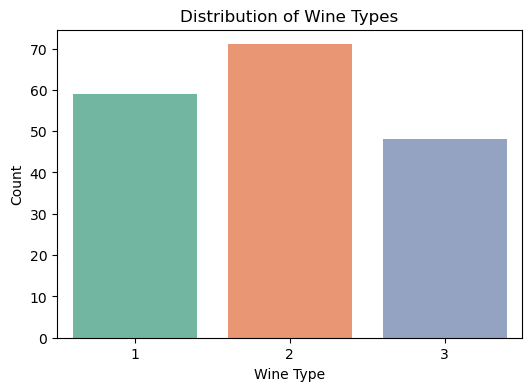

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Wine Types")
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.show

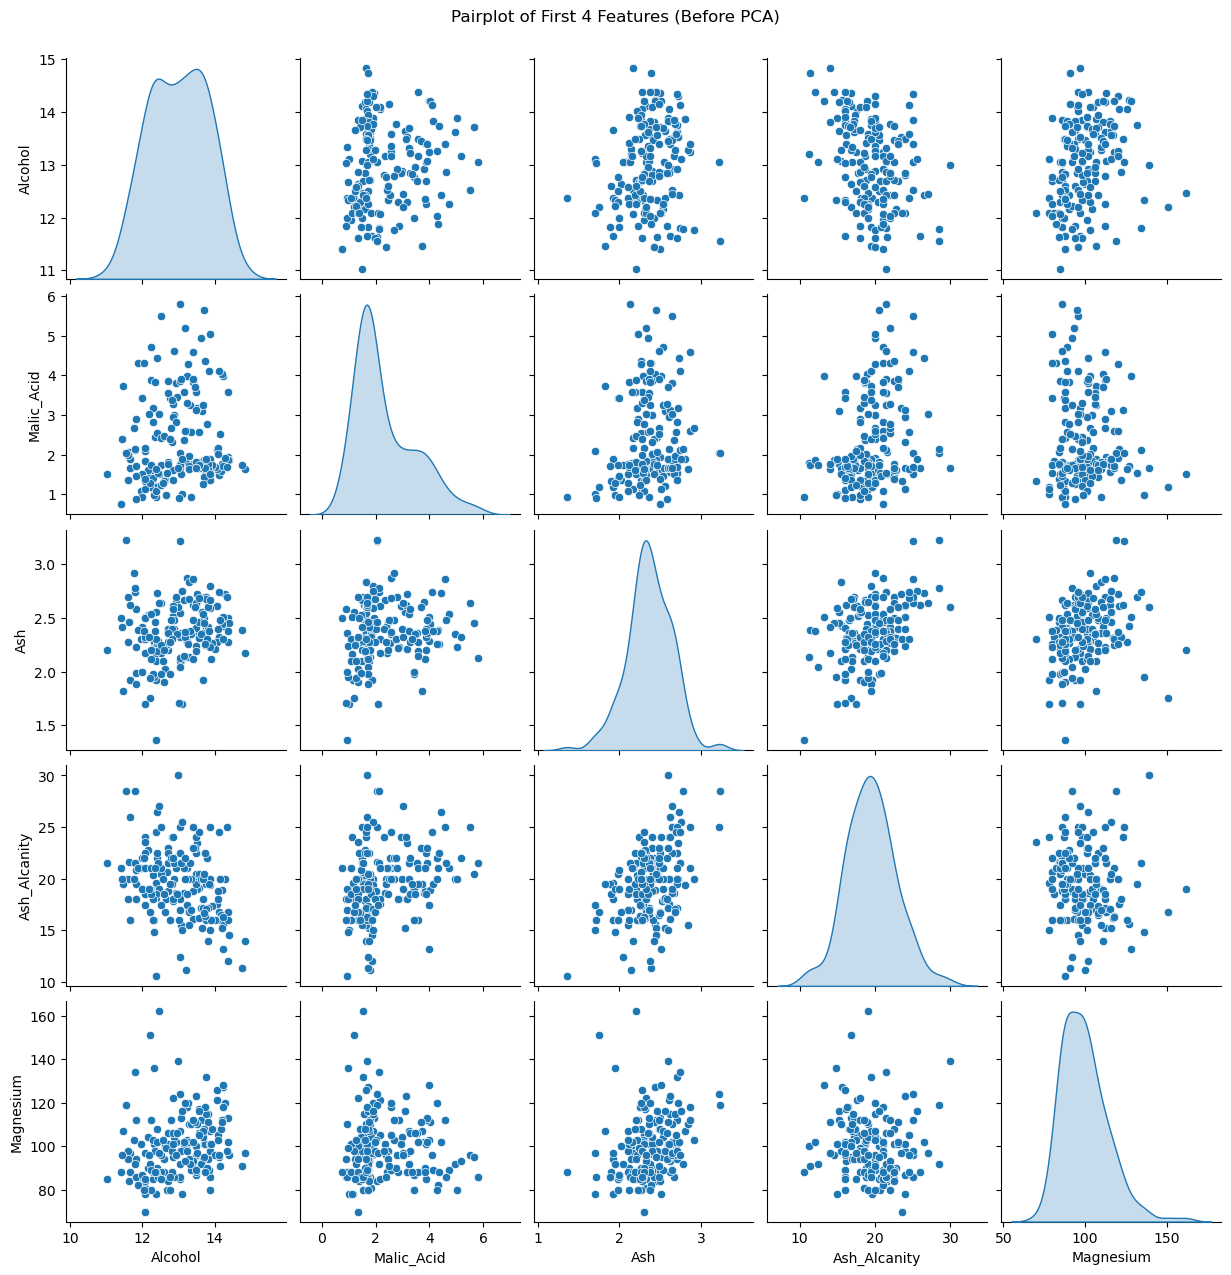

In [9]:
# 4.3 Pairplot (first 4 features only for visualization)
sns.pairplot(data.iloc[:, :5], diag_kind="kde")
plt.suptitle("Pairplot of First 4 Features (Before PCA)", y=1.02)
plt.show()

In [10]:
# Correlation Heatmap
corr = data.corr()

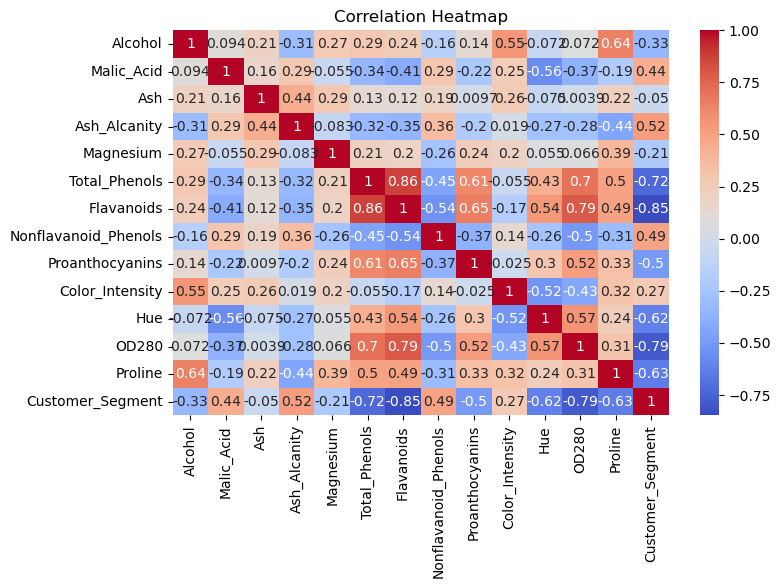

In [11]:

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Step 5: Train-Test Split
# -----------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Step 6: Model WITHOUT PCA
# -----------------------------------------------------------------
clf_orig = LogisticRegression(max_iter=500)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)


--- Model WITHOUT PCA ---
Accuracy: 0.9722222222222222


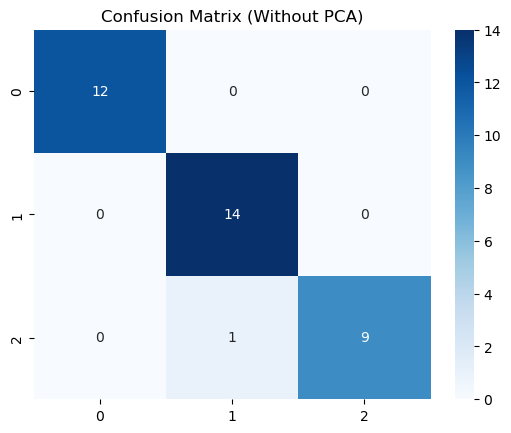

In [14]:
print("\n--- Model WITHOUT PCA ---")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
sns.heatmap(confusion_matrix(y_test, y_pred_orig), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Without PCA)")
plt.show()

In [15]:
# Step 7: PCA Transformation
# -----------------------------------------------------------------
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [16]:
print("\nExplained Variance Ratio (2 PCs ):", pca.explained_variance_ratio_)


Explained Variance Ratio (2 PCs ): [0.36198848 0.1920749  0.11123631]


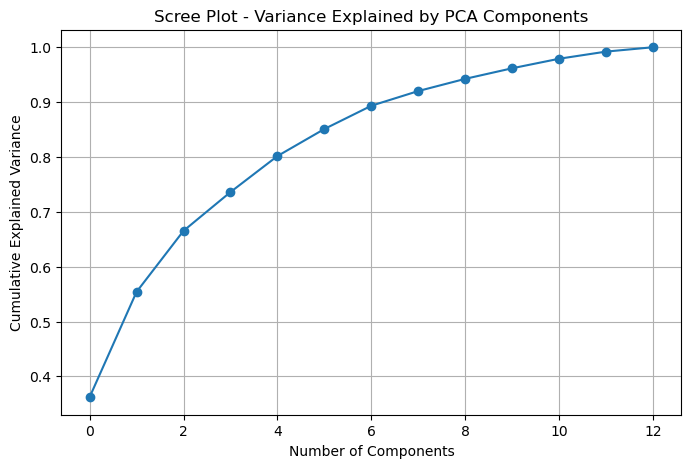

In [17]:
# Scree Plot (variance explained by each component)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_), marker='o')
plt.title("Scree Plot - Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [18]:
# Step 8: Model WITH PCA
# -----------------------------------------------------------------
Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
clf_pca = LogisticRegression(max_iter=500)
clf_pca.fit(Xp_train, yp_train)
yp_pred = clf_pca.predict(Xp_test)


--- Model WITH PCA ---
Accuracy: 0.9722222222222222


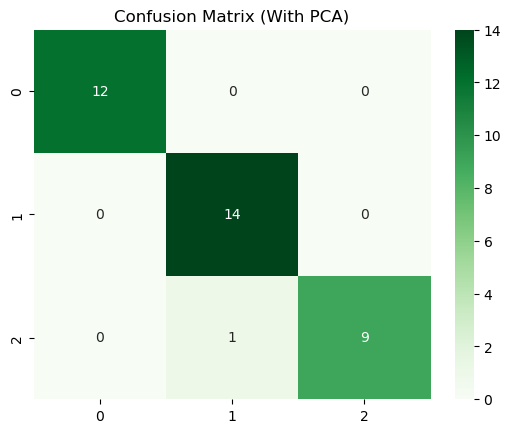

In [20]:

print("\n--- Model WITH PCA ---")
print("Accuracy:", accuracy_score(yp_test, yp_pred))
sns.heatmap(confusion_matrix(yp_test, yp_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix (With PCA)")
plt.show()